In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [31]:
results = {'CMMFNet': '2409032239', 
           'TMSS': '2410061102',
           'MultiSurv': '2409291045',
       'RESNET18-32': '2408031253', 
       'RESNET18-128': '2408040923', 
       'ViT-32': '2409201810', 
       'ViT-128': '2409211200', 
      }

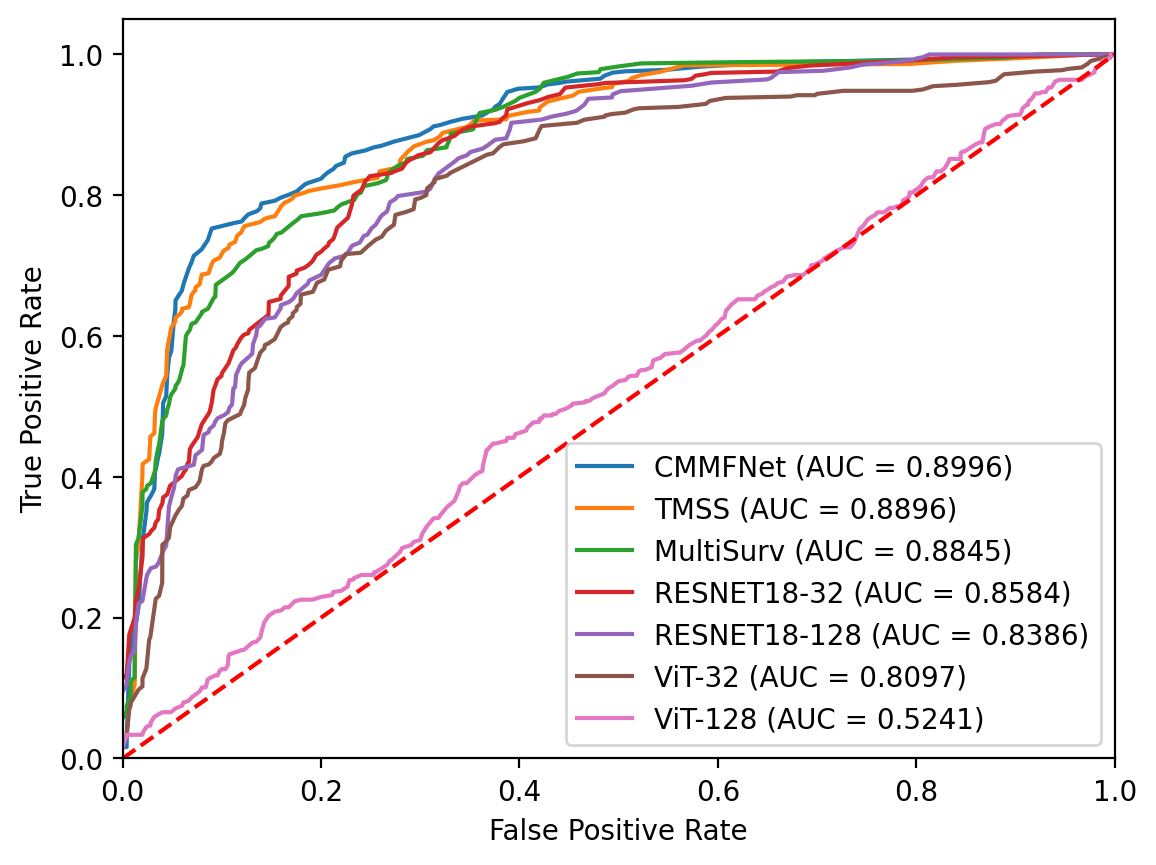

In [42]:
plt.figure(dpi=200)
for k, v in results.items():
    if os.path.exists(f'./results/{v}/models/pred.npy'):
        res = np.load(os.path.join(f'./results/{v}/models/pred.npy'), allow_pickle=True).item()
        # res
        # y_true_bin = label_binarize(res['true_label'], classes=[0, 1, 2])
        # y_scores = res['predicted']
        # fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_scores.ravel())
        # roc_auc_micro = auc(fpr_micro, tpr_micro)
        # plt.plot(fpr_micro, tpr_micro, color='blue', label=f'{k} ROC curve (area = %0.2f)' % roc_auc_micro)
        y_true_bin = label_binarize(res['true_label'], classes=[0, 1, 2])
        y_scores = res['predicted']  # 假设这是预测的概率
        
        # 计算每个类别的ROC曲线和AUC
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(y_true_bin.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # 计算macro-average ROC曲线
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_true_bin.shape[1])]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(y_true_bin.shape[1]):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= y_true_bin.shape[1]
        
        # 计算macro-average AUC
        roc_auc_macro = auc(all_fpr, mean_tpr)
        
        # 绘制macro-average ROC曲线
        plt.plot(all_fpr, mean_tpr, label=f'{k} (AUC = %0.4f)' % roc_auc_macro)

    else:
        print(k)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('./results/figures/roc.png')
plt.show()    
# one_hot_labels = torch.nn.functional.one_hot(torch.tensor(label), num_classes=probabilities.shape[1])
# auc = roc_auc_score(one_hot_labels, probabilities.numpy(),
#                     multi_class='ovr', average='macro')
# roc_auc_micro

In [40]:
os.makedirs('./results/figures')

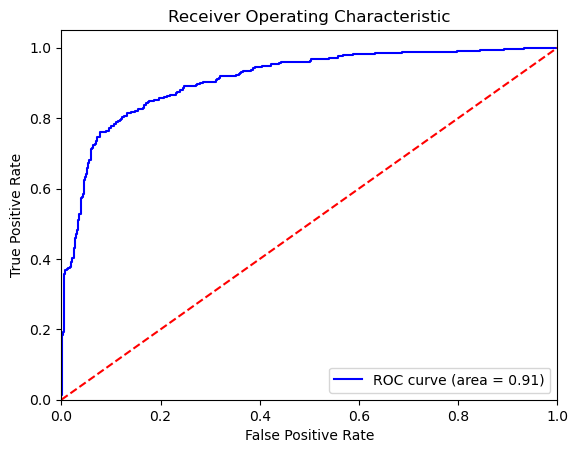

In [13]:
plt.figure()
plt.plot(fpr_micro, tpr_micro, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 